<h1> EDA project 
</h1> 

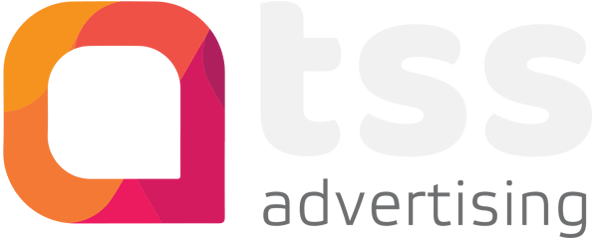

In [637]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read data

In [638]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

In [639]:
df3 = get_data([210327,210320,210313,210306])
df6 = get_data([210626,210619,210612,210605])
df8 = get_data([210828,210821,210814,210807])
df4 = get_data([210424,210417,210410,210403])

In [640]:
df6["month"]=6
df3["month"]=3
df4["month"]=4
df8["month"]=8


In [641]:
frames = [df6,df3,df4,df8]
df = pd.concat(frames)
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,month
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/19/2021,00:00:00,REGULAR,7589159,2594185,6
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/19/2021,04:00:00,REGULAR,7589165,2594190,6
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/19/2021,08:00:00,REGULAR,7589174,2594207,6
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/19/2021,12:00:00,REGULAR,7589214,2594253,6
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/19/2021,16:00:00,REGULAR,7589300,2594278,6
...,...,...,...,...,...,...,...,...,...,...,...,...
209497,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/06/2021,05:00:00,REGULAR,5554,593,8
209498,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/06/2021,09:00:00,REGULAR,5554,593,8
209499,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/06/2021,13:00:00,REGULAR,5554,593,8
209500,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/06/2021,17:00:00,REGULAR,5554,593,8


In [642]:
 #install via Anaconda
!conda install -c anaconda sqlalchemy
# import
from sqlalchemy import create_engine

Solving environment: done

# All requested packages already installed.



### Convert to sql database

In [643]:
#Convert to sql database # Conver to sql database  
engine = create_engine("sqlite:///MTA_Database.db") 
sqlite_connection = engine.connect() 
df.to_sql('MTA_Table', con=sqlite_connection, index=False, if_exists='replace')

#Read the MTA_Table 
engine = create_engine("sqlite:///MTA_Database.db") 
engine.table_names()

['MTA_Table']

In [644]:
df = pd.read_sql("select * from MTA_Table", engine)

### Data pre-processing 

In [645]:
df.drop_duplicates(inplace=True)

In [646]:
df.isna().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
month                                                                   0
dtype: int64

In [647]:
df=df[df.DESC != 'RECOVR AUD']

In [648]:
df.SCP.str.replace("/",'-')

0          02-00-00
1          02-00-00
2          02-00-00
3          02-00-00
4          02-00-00
             ...   
3347278    00-05-01
3347279    00-05-01
3347280    00-05-01
3347281    00-05-01
3347282    00-05-01
Name: SCP, Length: 3334136, dtype: object

In [649]:
df['TURNSTILE'] = df['C/A'] + '-' + df['UNIT'] + '-' + df['SCP']

In [650]:
df['DATETIME'] = df["DATE"]+ " " + df["TIME"]

df['DATETIME'] = pd.to_datetime(df['DATETIME'], format='%m/%d/%Y %H:%M:%S')

In [651]:
df["NAMEOFDAY"]= df["DATETIME"].dt.day_name()

In [652]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'month', 'TURNSTILE', 'DATETIME', 'NAMEOFDAY'],
      dtype='object')

In [653]:
df.columns=df.columns.str.strip()

In [654]:
turnstiles_daily = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        [["ENTRIES","EXITS","month","LINENAME","TIME","DATETIME","NAMEOFDAY","TURNSTILE"]].first())

In [655]:
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,month,LINENAME,TIME,DATETIME,NAMEOFDAY,TURNSTILE
0,A002,R051,02-00-00,59 ST,02/27/2021,7537255,2570434,3,NQR456W,03:00:00,2021-02-27 03:00:00,Saturday,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,02/28/2021,7537598,2570598,3,NQR456W,03:00:00,2021-02-28 03:00:00,Sunday,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,03/01/2021,7537860,2570718,3,NQR456W,03:00:00,2021-03-01 03:00:00,Monday,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,03/02/2021,7538409,2570969,3,NQR456W,03:00:00,2021-03-02 03:00:00,Tuesday,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,03/03/2021,7538938,2571214,3,NQR456W,03:00:00,2021-03-03 03:00:00,Wednesday,A002-R051-02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
559114,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/23/2021,5554,613,8,R,01:00:00,2021-08-23 01:00:00,Monday,TRAM2-R469-00-05-01
559115,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/24/2021,5554,614,8,R,01:00:00,2021-08-24 01:00:00,Tuesday,TRAM2-R469-00-05-01
559116,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/25/2021,5554,614,8,R,01:00:00,2021-08-25 01:00:00,Wednesday,TRAM2-R469-00-05-01
559117,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/26/2021,5554,614,8,R,01:00:00,2021-08-26 01:00:00,Thursday,TRAM2-R469-00-05-01


In [656]:
turnstiles_daily["DAILY_EXITS"] = (turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])[["EXITS"]].diff())

In [657]:
turnstiles_daily.drop(turnstiles_daily[turnstiles_daily.DAILY_EXITS <0].index,inplace = True)
turnstiles_daily.dropna(subset=["DAILY_EXITS"], axis=0, inplace = True)

In [658]:
turnstiles_daily["DAILY_ENTRIES"] = (turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])[["ENTRIES"]].diff())
turnstiles_daily.dropna(subset=["DAILY_ENTRIES"], axis=0, inplace = True)
turnstiles_daily.drop(turnstiles_daily[turnstiles_daily.DAILY_ENTRIES <0].index,inplace = True)


In [659]:
turnstiles_daily["TRAFFIC"] = turnstiles_daily["DAILY_ENTRIES"] + turnstiles_daily["DAILY_EXITS"]

## EDA

In [662]:
turnstiles_daily["STATION"].value_counts()

34 ST-PENN STA     11050
FULTON ST          10525
GRD CNTRL-42 ST     9500
23 ST               7912
86 ST               7047
                   ...  
SUTTER AV            220
190 ST               220
CLEVELAND ST         220
225 ST               220
182-183 STS          220
Name: STATION, Length: 379, dtype: int64

In [663]:
print("Maximum date: ")
print(df["DATE"].max())
print()
print("Maximum time: ")
print(df["TIME"].max())

Maximum date: 
08/27/2021

Maximum time: 
23:59:58


In [664]:
turnstiles_daily.groupby("month").DAILY_ENTRIES.mean()

month
3      650.684092
4    39056.000456
6    15296.036856
8     1307.673916
Name: DAILY_ENTRIES, dtype: float64

In [665]:
turnstiles_daily.groupby("TURNSTILE").DAILY_ENTRIES.mean().sort_values(ascending=False)

TURNSTILE
J003-R352-00-00-00     4.456304e+07
R412-R146-00-00-01     2.143726e+07
N181A-R464-00-05-00    1.434871e+07
R258-R132-00-06-02     9.420484e+06
N217-R112-00-00-02     6.079214e+06
                           ...     
A049-R088-02-05-01     0.000000e+00
N223-R156-01-05-01     0.000000e+00
N222-R156-00-05-01     0.000000e+00
N220-R155-01-06-01     0.000000e+00
TRAM2-R469-00-05-01    0.000000e+00
Name: DAILY_ENTRIES, Length: 4975, dtype: float64

In [666]:
# Finding top 7 busiest stations based on traffic
mta_top7 = turnstiles_daily.groupby("STATION").TRAFFIC.median().sort_values(ascending=False).head(7)
mta_top7 = mta_top7.reset_index()
mta_top7 

,STATION,TRAFFIC
0,JUNCTION BLVD,2283.5
1,103 ST-CORONA,2181.5
2,191 ST,2158.5
3,JKSN HT-ROOSVLT,1827.5
4,FLUSHING-MAIN,1782.5
5,82 ST-JACKSON H,1778.0
6,WESTCHESTER SQ,1725.0


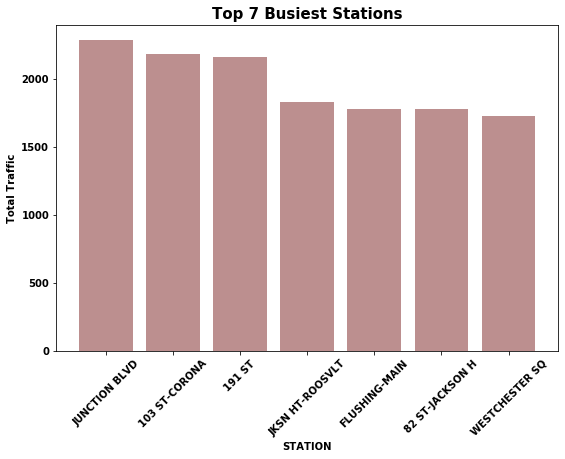

In [682]:
plt.figure(figsize=(9,6)),
plt.bar(x="STATION", height="TRAFFIC", data=mta_top7,color="rosybrown")
plt.title("Top 7 Busiest Stations", weight="bold",fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=45, weight="bold")
plt.xlabel("STATION",weight= "bold")
plt.ylabel("Total Traffic",weight= "bold")
plt.yticks(weight="bold")
plt.show()

In [668]:
mta_busiest_day = turnstiles_daily.groupby("NAMEOFDAY").TRAFFIC.median().sort_values(ascending=False)
mta_busiest_day = mta_busiest_day.reset_index()
mta_busiest_day

,NAMEOFDAY,TRAFFIC
0,Saturday,725.0
1,Thursday,635.0
2,Friday,633.0
3,Wednesday,626.0
4,Tuesday,566.0
5,Sunday,413.0
6,Monday,289.0


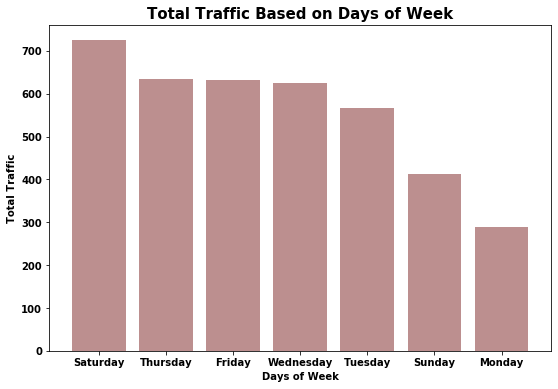

In [683]:

plt.figure(figsize=(9,6)),
plt.bar(x="NAMEOFDAY", height="TRAFFIC", data=mta_busiest_day,color="rosybrown")
plt.title("Total Traffic Based on Days of Week", weight="bold",fontsize=15)
plt.ylabel("Total Traffic",weight= "bold")
plt.xlabel("Days of Week",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()


In [670]:
print("the total traffic in March: ",turnstiles_daily[turnstiles_daily["month"]==3].TRAFFIC.median())
print("the total traffic in April: ",turnstiles_daily[turnstiles_daily["month"]==4].TRAFFIC.median())
print("the total traffic in june: ",turnstiles_daily[turnstiles_daily["month"]==6].TRAFFIC.median())
print("the total traffic in Augast: ",turnstiles_daily[turnstiles_daily["month"]==8].TRAFFIC.median())

the total traffic in March:  453.0
the total traffic in April:  474.0
the total traffic in june:  604.0
the total traffic in Augast:  617.0


In [671]:
dfMonth3= turnstiles_daily[turnstiles_daily["month"]== 3]
dfMonth4= turnstiles_daily[turnstiles_daily["month"]== 4]
dfMonth6= turnstiles_daily[turnstiles_daily["month"]== 6]
dfMonth8= turnstiles_daily[turnstiles_daily["month"]== 8]


dfMonth3D=dfMonth3.groupby("NAMEOFDAY").TRAFFIC.median().sort_values(ascending=False)
dfMonth3D = dfMonth3D.reset_index()

dfMonth4D=dfMonth4.groupby("NAMEOFDAY").TRAFFIC.median().sort_values(ascending=False)
dfMonth4D = dfMonth4D.reset_index()

dfMonth6D=dfMonth6.groupby("NAMEOFDAY").TRAFFIC.median().sort_values(ascending=False)
dfMonth6D = dfMonth6D.reset_index()

dfMonth8D=dfMonth8.groupby("NAMEOFDAY").TRAFFIC.median().sort_values(ascending=False)
dfMonth8D = dfMonth8D.reset_index()



In [672]:
dfMonth3S=dfMonth3.groupby("STATION").TRAFFIC.median().sort_values(ascending=False).head(7)
dfMonth3S = dfMonth3S.reset_index()

dfMonth4S=dfMonth4.groupby("STATION").TRAFFIC.median().sort_values(ascending=False).head(7)
dfMonth4S = dfMonth4S.reset_index()

dfMonth6S=dfMonth6.groupby("STATION").TRAFFIC.median().sort_values(ascending=False).head(7)
dfMonth6S = dfMonth6S.reset_index()

dfMonth8S=dfMonth8.groupby("STATION").TRAFFIC.median().sort_values(ascending=False).head(7)
dfMonth8S = dfMonth8S.reset_index()

In [673]:
dfMonth3S

,STATION,TRAFFIC
0,JUNCTION BLVD,2271.5
1,191 ST,2062.0
2,103 ST-CORONA,1974.0
3,JKSN HT-ROOSVLT,1684.0
4,FLUSHING-MAIN,1651.0
5,82 ST-JACKSON H,1623.0
6,WESTCHESTER SQ,1594.0


In [674]:
df["DATE_TIME"] = pd.to_datetime(df.DATE + " "+df.TIME)

In [675]:
mask = (
    (df["C/A"] == "N702")&
    (df.UNIT == "R572")&
    (df.SCP == "00-05-00")&
    (df.STATION == "96 ST-2 AVE")&
    (df.month == 3)&
    (df.DATE_TIME.dt.day > 13)
)
df[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,month,TURNSTILE,DATETIME,NAMEOFDAY,DATE_TIME
954313,N702,R572,00-05-00,96 ST-2 AVE,Q,IND,03/24/2021,01:00:00,REGULAR,33030162,654311428,3,N702-R572-00-05-00,2021-03-24 01:00:00,Wednesday,2021-03-24 01:00:00
954314,N702,R572,00-05-00,96 ST-2 AVE,Q,IND,03/24/2021,05:00:00,REGULAR,33030162,654311428,3,N702-R572-00-05-00,2021-03-24 05:00:00,Wednesday,2021-03-24 05:00:00
954315,N702,R572,00-05-00,96 ST-2 AVE,Q,IND,03/24/2021,09:00:00,REGULAR,33030164,654311428,3,N702-R572-00-05-00,2021-03-24 09:00:00,Wednesday,2021-03-24 09:00:00
954316,N702,R572,00-05-00,96 ST-2 AVE,Q,IND,03/24/2021,13:00:00,REGULAR,33030165,654311428,3,N702-R572-00-05-00,2021-03-24 13:00:00,Wednesday,2021-03-24 13:00:00
954317,N702,R572,00-05-00,96 ST-2 AVE,Q,IND,03/24/2021,17:00:00,REGULAR,33030165,654311428,3,N702-R572-00-05-00,2021-03-24 17:00:00,Wednesday,2021-03-24 17:00:00
954318,N702,R572,00-05-00,96 ST-2 AVE,Q,IND,03/24/2021,21:00:00,REGULAR,33030166,654311428,3,N702-R572-00-05-00,2021-03-24 21:00:00,Wednesday,2021-03-24 21:00:00
954319,N702,R572,00-05-00,96 ST-2 AVE,Q,IND,03/25/2021,01:00:00,REGULAR,33030166,654311428,3,N702-R572-00-05-00,2021-03-25 01:00:00,Thursday,2021-03-25 01:00:00
954320,N702,R572,00-05-00,96 ST-2 AVE,Q,IND,03/25/2021,05:00:00,REGULAR,33030166,654311428,3,N702-R572-00-05-00,2021-03-25 05:00:00,Thursday,2021-03-25 05:00:00
954321,N702,R572,00-05-00,96 ST-2 AVE,Q,IND,03/25/2021,09:00:00,REGULAR,33030166,654311428,3,N702-R572-00-05-00,2021-03-25 09:00:00,Thursday,2021-03-25 09:00:00
954322,N702,R572,00-05-00,96 ST-2 AVE,Q,IND,03/25/2021,13:00:00,REGULAR,33030166,654311428,3,N702-R572-00-05-00,2021-03-25 13:00:00,Thursday,2021-03-25 13:00:00


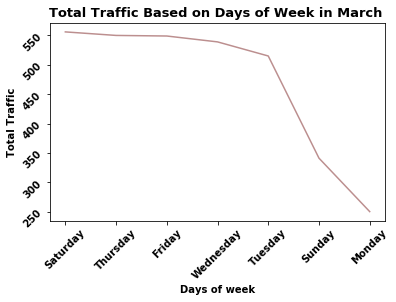

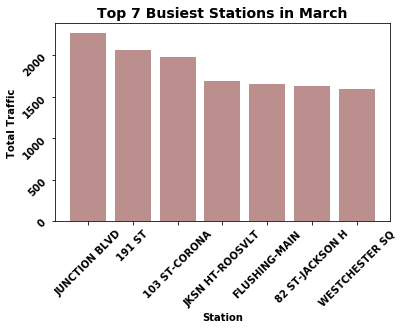

In [676]:
plt.figure(figsize=(6,8)),
plt.subplot(2,1,1)
plt.plot("NAMEOFDAY", "TRAFFIC", data=dfMonth3D,color="rosybrown")
plt.title("Total Traffic Based on Days of Week in March ", weight="bold",fontsize=13)
plt.ylabel("Total Traffic",weight= "bold")
plt.yticks(rotation=45,weight="bold")
plt.xticks(rotation=45,weight="bold")
plt.xlabel("Days of week",weight= "bold")
plt.show()


plt.figure(figsize=(6,8)),
plt.subplot(2,1,2)
plt.bar(x="STATION", height="TRAFFIC", data=dfMonth3S,color="rosybrown")
plt.title("Top 7 Busiest Stations in March", weight="bold",fontsize=14)
plt.xlabel("Station",weight="bold")
plt.xticks(rotation=45, weight="bold")
plt.ylabel("Total Traffic",weight= "bold")
plt.yticks(rotation=45,weight="bold")
plt.show()


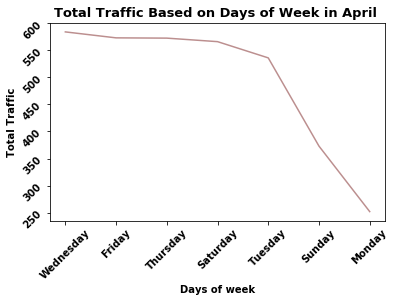

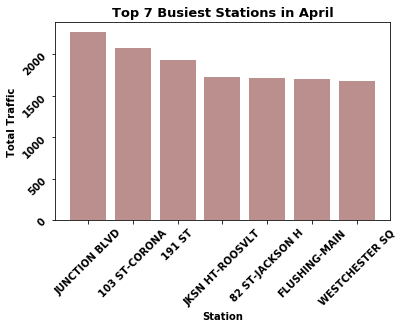

In [677]:
plt.figure(figsize=(6,8)),
plt.subplot(2,1,1)
plt.plot("NAMEOFDAY", "TRAFFIC", data=dfMonth4D,color="rosybrown")
plt.title("Total Traffic Based on Days of Week in April ", weight="bold",fontsize=13)
plt.ylabel("Total Traffic",weight= "bold")
plt.xlabel("Days of week",weight="bold")
plt.yticks(rotation=45,weight="bold")
plt.xticks(rotation=45,weight="bold")
plt.show()


plt.figure(figsize=(6,8)),
plt.subplot(2,1,2)
plt.bar(x="STATION", height="TRAFFIC", data=dfMonth4S,color="rosybrown")
plt.title("Top 7 Busiest Stations in April", weight="bold",fontsize=13)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=45, weight="bold")
plt.ylabel("Total Traffic",weight= "bold")
plt.xlabel("Station",weight="bold")
plt.yticks(rotation=45,weight="bold")
plt.show()

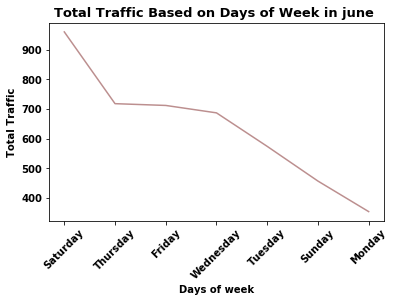

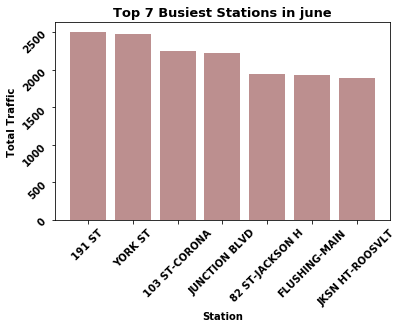

In [678]:
plt.figure(figsize=(6,8)),
plt.subplot(2,1,1)
plt.plot("NAMEOFDAY", "TRAFFIC", data=dfMonth6D,color="rosybrown")
plt.title("Total Traffic Based on Days of Week in june ", weight="bold",fontsize=13)
plt.ylabel("Total Traffic",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(rotation=45,weight="bold")
plt.xlabel("Days of week",weight="bold")
plt.show()

plt.figure(figsize=(6,8)),
plt.subplot(2,1,2)
plt.bar(x="STATION", height="TRAFFIC", data=dfMonth6S,color="rosybrown")
plt.title("Top 7 Busiest Stations in june", weight="bold",fontsize=13)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=45, weight="bold")
plt.xlabel("Station",weight="bold")
plt.ylabel("Total Traffic",weight= "bold")
plt.yticks(rotation=45,weight="bold")
plt.show()

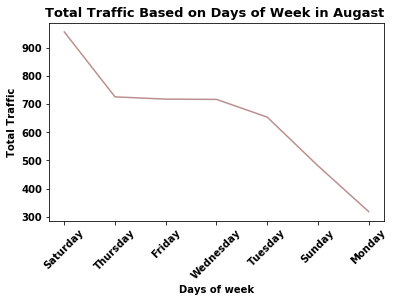

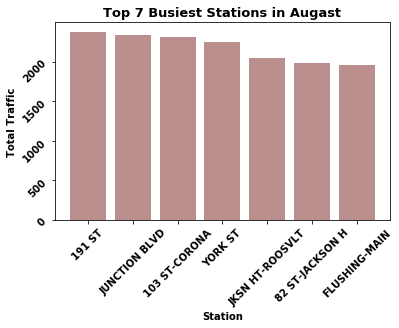

In [679]:
plt.figure(figsize=(6,8)),
plt.subplot(2,1,1)
plt.plot("NAMEOFDAY", "TRAFFIC", data=dfMonth8D,color="rosybrown")
plt.title("Total Traffic Based on Days of Week in Augast ", weight="bold",fontsize=13)
plt.ylabel("Total Traffic",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(rotation=45,weight="bold")
plt.xlabel("Days of week",weight="bold")
plt.show()

plt.figure(figsize=(6,8)),
plt.subplot(2,1,2)
plt.bar(x="STATION", height="TRAFFIC", data=dfMonth8S,color="rosybrown")
plt.title("Top 7 Busiest Stations in Augast", weight="bold",fontsize=13)
plt.xlabel("",weight="bold")
plt.xticks(rotation=45, weight="bold")
plt.ylabel("Total Traffic",weight= "bold")
plt.yticks(rotation=45,weight="bold")
plt.xlabel("Station",weight="bold")
plt.show()

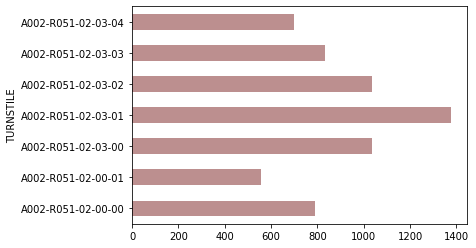

In [680]:
top=turnstiles_daily.groupby("TURNSTILE").TRAFFIC.median().head(7).plot(kind='barh',color="rosybrown")
